In [98]:
password = None

In [99]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import getpass
import pandas as pd
import numpy as np

from utils import load_json_benchmarks, filter_results, plot_comparison

repetitions = 10

In [100]:
if password is None:
    password = getpass.getpass()

In [101]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


```
../../cmake-build-release/benchmark/comparison/benchmark-s3rvac-cpp-bencoding \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-s3rvac-cpp-bencoding.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-jimporter-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-arvidn-libtorrent \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-arvidn-libtorrent.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-rakshasa-libtorrent \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-rakshasa-libtorrent.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-kriben-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-kriben-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-theanti9-cppbencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-theanti9-cppbencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-outputenable-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-outputenable-bencode.json"
```

```
../../cmake-build-release-sse/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-sse41.json"
```

```
../../cmake-build-release-avx/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-avx2.json"
```

In [102]:
# reenable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g powersave

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [103]:
libraries = [
    ("benchmark-jimporter-bencode.json",    "jimporter/bencode"),
    ("benchmark-arvidn-libtorrent.json",    "arvidn/libtorrent"),
    ("benchmark-s3rvac-cpp-bencoding.json", "s3rvac/cpp-bencoding"),
    ("benchmark-rakshasa-libtorrent.json",  "rakshasa/libtorrent"),
    ("benchmark-kriben-bencode.json",       "kriben/bencode"),
    ("benchmark-theanti9-cppbencode.json",  "theanti9/cppbencode"),
    ("benchmark-outputenable-bencode.json", "outputenable/bencode"),
    ("benchmark-fbdtemme-bencode.json",     "fbdtemme/bencode"),
]

df = pd.concat([
    filter_results(load_json_benchmarks(result), lib_name) for result, lib_name in libraries
])

In [104]:
grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})


In [105]:
results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)

drop_list = ["arvidn/libtorrent", "outputenable/bencode"]

for lib_name in drop_list:
    results_value = results_value.drop(index=lib_name)

results_value[~np.isfinite(results_value)] = 0

In [106]:
drop_list = ["s3rvac/cpp-bencoding", "kriben/bencode", "rakshasa/libtorrent", "theanti9/cppbencode"]

results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)
for lib_name in drop_list:
    results_view = results_view.drop(index=lib_name)

results_view

mean        stddev
library              test_file                             
arvidn/libtorrent    camelyon17  7.216266e+10  1.151208e+09
                     covid       1.566195e+09  2.240555e+07
                     integers    6.694081e+08  9.080431e+06
                     pneumonia   1.098008e+09  1.864587e+07
                     ubuntu      1.481210e+11  9.643982e+08
fbdtemme/bencode     camelyon17  6.650194e+10  1.177256e+09
                     covid       1.509965e+09  2.656718e+07
                     integers    1.037575e+09  1.382784e+07
                     pneumonia   8.994174e+08  1.480848e+07
                     ubuntu      1.697162e+11  9.203986e+09
jimporter/bencode    camelyon17  7.918457e+09  5.672948e+08
                     covid       3.016794e+08  2.410780e+07
                     integers    5.779231e+08  2.339814e+07
                     pneumonia   1.201310e+08  6.259733e+06
                     ubuntu      7.561897e+10  3.043646e+09
outputenable/bencode camelyon17  6.675853e+10  1.121242e+09
                     covid       1.533683e+09  3.211811e+07
                     integers    6.348555e+08  8.734942e+06
                     pneumonia   1.029478e+09  2.821899e+07
                     ubuntu      1.514103e+11  2.481077e+09

Index(['fbdtemme/bencode', 'jimporter/bencode', 'kriben/bencode',
       'rakshasa/libtorrent', 's3rvac/cpp-bencoding', 'theanti9/cppbencode'],
      dtype='object', name='library')


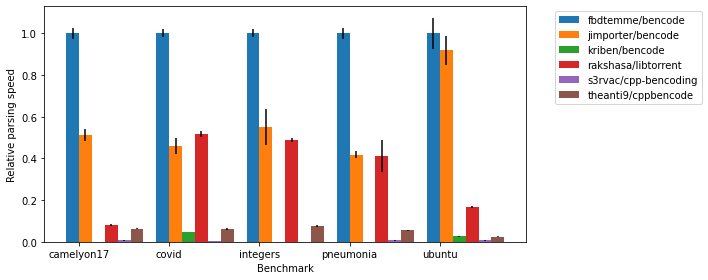

In [112]:
ax = plot_comparison(results_value, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-value.svg")

Index(['arvidn/libtorrent', 'fbdtemme/bencode', 'jimporter/bencode',
       'outputenable/bencode'],
      dtype='object', name='library')


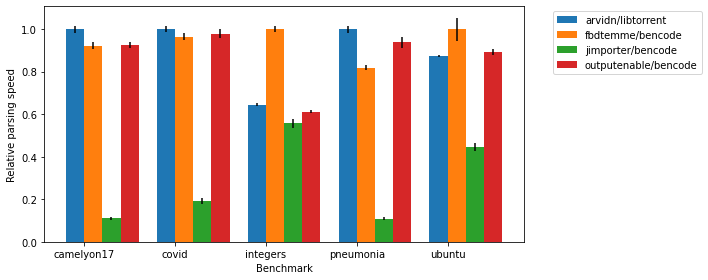

In [108]:
ax = plot_comparison(results_view, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-view.svg")